# **Unzipping**

In [ ]:
pip freeze

In [ ]:
pwd

In [ ]:
ls 

In [4]:
!unzip drive/MyDrive/pubhealth/data/PUBHEALTH.zip -d drive/MyDrive/pubhealth/data/raw

Archive:  drive/MyDrive/pubhealth/data/PUBHEALTH.zip
replace drive/MyDrive/pubhealth/data/raw/PUBHEALTH/train.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
ls drive/MyDrive/pubhealth/data/raw/PUBHEALTH/

dev.tsv  test.tsv  train.tsv


# **Exploratory Analysis and Preprocessing**

In [6]:
import pandas as pd

In [7]:
train = pd.read_csv('drive/MyDrive/pubhealth/data/raw/PUBHEALTH/train.tsv', sep='\t')
dev = pd.read_csv('drive/MyDrive/pubhealth/data/raw/PUBHEALTH/dev.tsv', sep='\t')
test = pd.read_csv('drive/MyDrive/pubhealth/data/raw/PUBHEALTH/test.tsv', sep='\t',index_col=0)

In [8]:
train.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [9]:
#verifying the columns coherence
train.columns.to_list() == dev.columns.to_list()== test.columns.to_list()

True

**Intuitive column selection though PCA study can be done based on tf-idf can be conducted**

In [10]:

train_df = train[['label', 'claim','main_text','explanation','subjects','sources']]
dev_df = dev[['label', 'claim','main_text','explanation','subjects']]
test_df = test[['label', 'claim','main_text','explanation','subjects']]

In [11]:
train_df.describe()

,label,claim,main_text,explanation,subjects,sources
count,9805,9824,9806,9824,9804,9804
unique,5,9824,9589,9675,5811,5063
top,true,"""The money the Clinton Foundation took from fr...",Doctors in India have been successful in treat...,false,Health News,
freq,5078,1,12,3,1242,4550


In [12]:
train_df.isna().sum()

label          27
claim           8
main_text      26
explanation     8
subjects       28
sources        28
dtype: int64

In [13]:
dev_df.describe()

,label,claim,main_text,explanation,subjects
count,1215,1219,1217,1219,1214
unique,5,1219,1212,1218,795
top,true,A baby died at an unnamed medical facility be...,Beta-Propiolactone is in vaccines and is known...,The largest study of its kind found new eviden...,Health News
freq,629,1,3,2,160


In [14]:
dev_df.isna().sum()

label          6
claim          2
main_text      4
explanation    2
subjects       7
dtype: int64

In [15]:
# dev_df.iloc[10].to_list() 

In [16]:
test_df.describe()

,label,claim,main_text,explanation,subjects
count,1233,1235,1235,1235,1233
unique,4,1235,1231,1234,840
top,true,A mother revealed to her child in a letter aft...,"If the new coronavirus gets into your mouth, d...","Plant-based food startup JUST, shortly to laun...",Health News
freq,599,1,2,2,142


In [17]:
test_df.isna().sum()

label          2
claim          0
main_text      0
explanation    0
subjects       2
dtype: int64

**There is seemingly something wrong with the labels of train and dev dataframes therefore this should be fixed + droping the na values**

In [18]:
print(train_df.label.unique())
print(dev_df.label.unique())
print(test_df.label.unique())

['false' 'mixture' 'true' 'unproven' nan 'snopes']
['unproven' 'true' 'false' 'mixture' nan
 'National, Candidate Biography, Donald Trump, ']
['false' 'true' 'unproven' 'mixture' nan]


**It shows clearly that there are , additionally to the nan values other wrong/outlier labels.**

In [19]:
train_df = train_df.dropna()
dev_df = dev_df.dropna()
test_df = test_df.dropna()

In [20]:
train_df[train_df.label == 'snopes'].size == 0 

True

In [21]:
print(train_df.label.unique())
print(dev_df.label.unique())
print(test_df.label.unique())

['false' 'mixture' 'true' 'unproven']
['unproven' 'true' 'false' 'mixture']
['false' 'true' 'unproven' 'mixture']


**To have an idea about sentences lengths for eac feature.**




In [ ]:
#helper function to get average lengths of the texts in each columns.
def tolist(col):
  '''column of string to list
  '''
  return col.to_list()

def avglist(strlist:list):
  '''get average of a list of strings
  '''
  return sum([len(s) for s in strlist])/len(strlist)

def average_columns_len(df,columns:list):
  ''' given a list of columns in data frame , the function should return s dict having as values an average of the lenght of sentence present in the columns which are keys
  '''
  res = dict()
  for col in columns:
    res[col]=round(avglist(tolist(df[col])),2)
  return res


In [ ]:
average_columns_len(pub_health_train,['claim','main_text','subjects','explanation','sources'])

{'claim': 85.69,
 'main_text': 4376.84,
 'subjects': 40.08,
 'explanation': 482.97,
 'sources': 390.47}

In [ ]:
#

**Visualize label distribution over the dataset**

Text(0.5, 1.0, 'test')

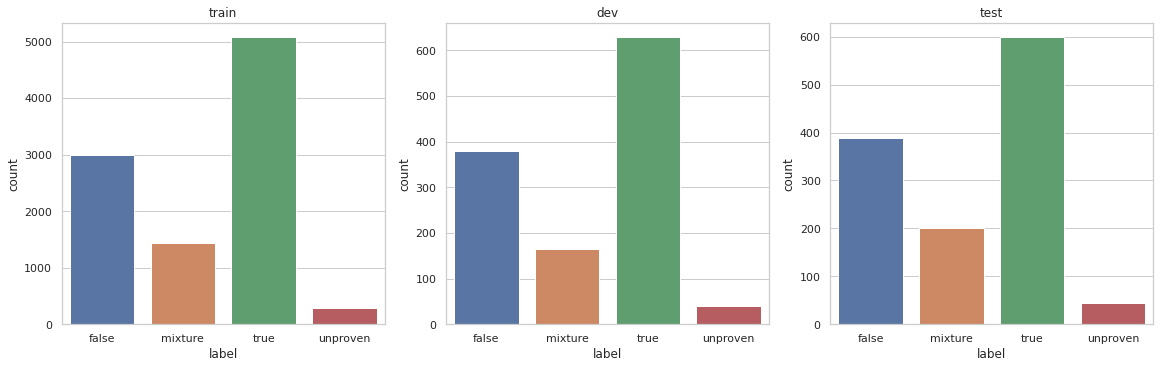

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['false', 'mixture', 'true', 'unproven']
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1,3,constrained_layout=True, figsize=(16, 5))
axesSub = sns.countplot(x="label", data=train_df, ax=ax[0], order=labels)
axesSub.set_title('train')
axesSub = sns.countplot(x="label", data=dev_df, ax=ax[1], order=labels)
axesSub.set_title('dev')
axesSub = sns.countplot(x="label", data=test_df, ax=ax[2], order=labels)
axesSub.set_title('test')

highly imbalanced data, thinking either cuting down the 'true' labeld data

In [23]:
# thinking about conducting a PCA on separated columns/features to see if any pattern appears for 

In [24]:
# save the clean data
train_df.to_csv('drive/MyDrive/pubhealth/data/clean/exp1/clean_train.tsv', sep='\t', index=False)
dev_df.to_csv('drive/MyDrive/pubhealth/data/clean/exp1/clean_dev.tsv', sep='\t', index=False)
test_df.to_csv('drive/MyDrive/pubhealth/data/clean/exp1/clean_test.tsv', sep='\t', index=False)